<a href="https://colab.research.google.com/github/gavbdheiver/Explainable-AI-shap/blob/main/Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [36]:
!pip install shap

Você pode instalar o SHAP a partir deste Github . A shap.summary_plotfunção plot_type=”bar”permite que você produza o gráfico de importância variável. Um gráfico de importância de variável lista as variáveis ​​mais significativas em ordem decrescente. As variáveis ​​principais contribuem mais para o modelo do que as inferiores e, portanto, têm alto poder preditivo.



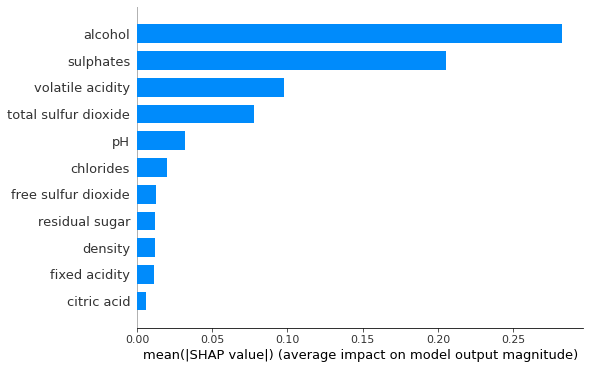

In [37]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

O gráfico de valor SHAP pode mostrar ainda os relacionamentos positivos e negativos dos preditores com a variável de destino. O código shap.summary_plot(shap_values, X_train)produz o seguinte gráfico:




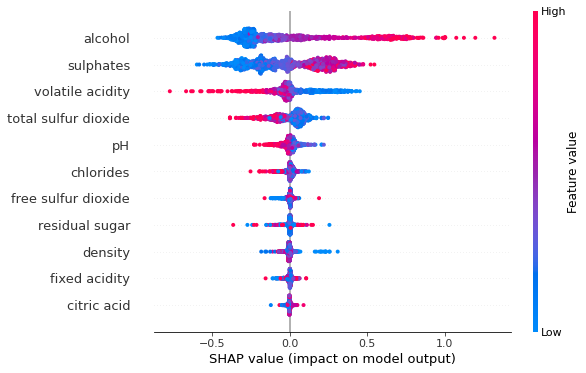

In [38]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Este gráfico é feito de todos os pontos nos dados do trem. Ele demonstra as seguintes informações:



*   Importância do recurso: as variáveis ​​são classificadas em ordem decrescente.
*   Impacto: a localização horizontal mostra se o efeito desse valor está associado a uma previsão mais alta ou mais baixa .
Impacto: a localização horizontal mostra se o efeito desse valor está associado a uma previsão mais alta ou mais baixa .
*   Valor original: a cor mostra se essa variável é alta (em vermelho) ou baixa (em azul) para aquela observação.
*   Correlação: um alto nível de teor de “álcool” tem um impacto alto e positivo na classificação de qualidade. O “alto” vem da cor vermelha e o impacto “positivo” é mostrado no eixo X. Da mesma forma, diremos que a “acidez volátil” está negativamente correlacionada com a variável alvo.







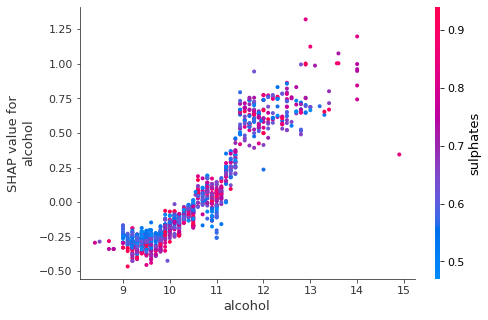

In [39]:
shap.dependence_plot('alcohol', shap_values, X_train)

Você pode perguntar como mostrar um gráfico de dependência parcial . O gráfico de dependência parcial mostra o efeito marginal que um ou dois recursos têm sobre o resultado previsto de um modelo de aprendizado de máquina ( JH Friedman 2001 ). Diz se a relação entre o alvo e uma característica é linear, monotônica ou mais complexa. A fim de criar um gráfico de dependência, você só precisa de uma linha de código: shap.dependence_plot(“alcohol”, shap_values, X_train). A função inclui automaticamente outra variável com a qual sua variável escolhida mais interage. O gráfico a seguir mostra que há uma tendência aproximadamente linear e positiva entre “álcool” e a variável alvo, e “álcool” interage com “sulfatos” frequentemente.



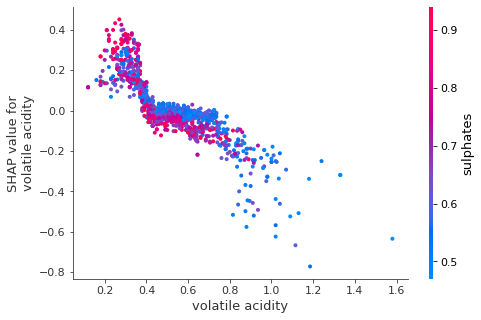

In [40]:
shap.dependence_plot('volatile acidity', shap_values, X_train)

Suponha que você queira saber "acidez volátil" e a variável com a qual ela mais interage, você pode fazer shap.dependence_plot(“volatile acidity”, shap_values, X_train). O gráfico abaixo mostra que existe uma relação aproximadamente linear, mas negativa, entre a “acidez volátil” e a variável alvo. Essa relação negativa já está demonstrada no gráfico de importância variável Figura.



Para mostrar como os valores de SHAP podem ser feitos em casos individuais, irei executar várias observações. Eu escolhi aleatoriamente algumas observações como mostrado na Tabela B abaixo:



In [41]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,4.50
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.35
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.26
1479,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5.93
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6.33
1519,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5.47
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,4.51


Se você usar o bloco de notas Jupyter, precisará inicializá-lo com initjs (). Para economizar espaço, escrevo uma pequena função shap_plot(j)para executar os valores de SHAP para as observações na Tabela B.



In [42]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [43]:
shap.initjs()
shap_plot(0)

In [44]:
shap.initjs()
shap_plot(1)


In [45]:
shap.initjs()
shap_plot(2)


In [46]:
X_train.mean()

fixed acidity            8.337373
volatile acidity         0.530000
citric acid              0.272181
residual sugar           2.553167
chlorides                0.087024
free sulfur dioxide     16.032838
total sulfur dioxide    47.114152
density                  0.996757
pH                       3.309828
sulphates                0.659077
alcohol                 10.413995
dtype: float64

In [47]:
Y_test.mean()

5.59375

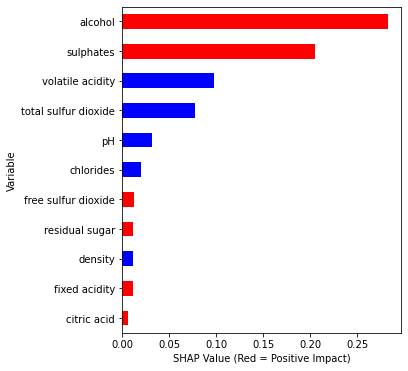

In [48]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train) 